# Market segmentation example
This notebook is excerpted and adapted from the course *The Data Science Course 2022: Complete Data Science Bootcamp* (https://www.udemy.com/course/the-data-science-course-complete-data-science-bootcamp), section 38 - Advanced Statistical Methods - K-Means Clustering, Mark Segmentation with Cluster Analysis.

## Import the relevant libraries

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Set the styles to Seaborn
sns.set()
# Import the KMeans module so we can perform k-means clustering with sklearn
from sklearn.cluster import KMeans

## Load the data

In [5]:
# Load the data
data = pd.read_csv ('3.12.Example.csv')

In [6]:
# Check what's inside
data

,Satisfaction,Loyalty
0,4,-1.33
1,6,-0.28
2,5,-0.99
3,7,-0.29
4,4,1.06
5,1,-1.66
6,10,-0.97
7,8,-0.32
8,8,1.02
9,8,0.68


## Features Explained
Figures were taken from slides from *The Data Science Course 2022: Complete Data Science Bootcamp* (https://www.udemy.com/course/the-data-science-course-complete-data-science-bootcamp)

![](https://drive.google.com/uc?export=view&id=1gHbDbBDNeKmtukowXrxvfRO6K7-uIpu6)

![](https://drive.google.com/uc?export=view&id=1kuFCK2B0L_pe3_TQF_8gMMVRSJds2gaS)


## Plot the data

Create a preliminary plot to see if you can spot something

Text(0, 0.5, 'Loyalty')

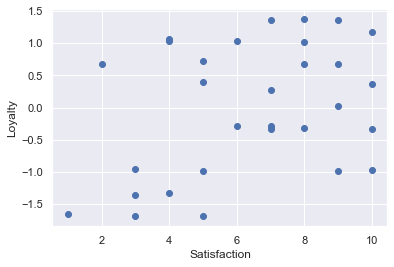

In [7]:
# We are creating a scatter plot of the two variables
plt.scatter(data['Satisfaction'],data['Loyalty'])
# Name your axes 
plt.xlabel('Satisfaction')
plt.ylabel('Loyalty')

## Select the features

In [8]:
# Select both features by creating a copy of the data variable
x = data.copy()

## Clustering

In [9]:
# Create an object (which we would call kmeans)
# The number in the brackets is K, or the number of clusters we are aiming for
kmeans = KMeans(2)
# Fit the data
kmeans.fit(x)

KMeans(n_clusters=2)

## Clustering results

In [10]:
# Create a copy of the input data
clusters = x.copy()
# Take note of the predicted clusters 
clusters['cluster_pred']=kmeans.fit_predict(x)

Text(0, 0.5, 'Loyalty')

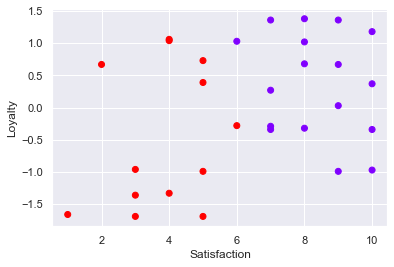

In [11]:
# Plot the data using the longitude and the latitude
# c (color) is an argument which could be coded with a variable 
# The variable in this case has values 0,1, indicating to plt.scatter, that there are two colors (0,1)
# All points in cluster 0 will be the same colour, all points in cluster 1 - another one, etc.
# cmap is the color map. Rainbow is a nice one, but you can check others here: https://matplotlib.org/users/colormaps.html
plt.scatter(clusters['Satisfaction'],clusters['Loyalty'],c=clusters['cluster_pred'],cmap='rainbow')
plt.xlabel('Satisfaction')
plt.ylabel('Loyalty')

## Standardize the variables

Let's standardize and check the new result

In [12]:
# Import a library which can do that easily
from sklearn import preprocessing
# Scale the inputs
# preprocessing.scale scales each variable (column in x) with respect to itself
# The new result is an array
x_scaled = preprocessing.scale(x)
x_scaled

array([[-0.93138063, -1.3318111 ],
       [-0.15523011, -0.28117124],
       [-0.54330537, -0.99160391],
       [ 0.23284516, -0.29117733],
       [-0.93138063,  1.05964534],
       [-2.09560642, -1.6620122 ],
       [ 1.39707095, -0.97159172],
       [ 0.62092042, -0.32119561],
       [ 0.62092042,  1.01962097],
       [ 0.62092042,  0.67941378],
       [ 1.39707095, -0.3412078 ],
       [-0.54330537,  0.38923705],
       [-0.54330537, -1.69203048],
       [-1.70753116,  0.66940768],
       [ 0.23284516,  0.26916393],
       [ 1.00899568,  1.35982816],
       [ 0.62092042,  1.37984035],
       [ 0.23284516,  1.35982816],
       [ 0.23284516, -0.3412078 ],
       [ 1.00899568,  0.66940768],
       [ 1.39707095,  1.17971847],
       [-1.31945589, -1.69203048],
       [-0.93138063,  1.03963316],
       [-1.31945589, -0.96158562],
       [-0.15523011,  1.02962706],
       [ 1.00899568, -0.99160391],
       [ 1.39707095,  0.36922486],
       [ 1.00899568,  0.02901767],
       [-1.31945589,

## Take advantage of the Elbow method

In [13]:
# Createa an empty list
wcss =[]

result = x.copy()
for i in range(1,11):
    # Clsuter solution with i clusters
    kmeans_new = KMeans(i, random_state=42)
    # Fit the STANDARDIZED data
    kmeans_new.fit(x_scaled)

    # Append predictions for the number of clusters
    result['cluster_pred_' + str(i)] = kmeans_new.fit_predict(x_scaled)

    # Append the WCSS (Within-Cluster Sum of Square) for the iteration
    wcss.append(kmeans_new.inertia_)
    

result    

,Satisfaction,Loyalty,cluster_pred_1,cluster_pred_2,cluster_pred_3,cluster_pred_4,cluster_pred_5,cluster_pred_6,cluster_pred_7,cluster_pred_8,cluster_pred_9,cluster_pred_10
0,4,-1.33,0,1,0,0,1,0,6,7,0,7
1,6,-0.28,0,0,2,2,0,5,2,3,6,4
2,5,-0.99,0,1,0,0,1,0,6,7,0,7
3,7,-0.29,0,0,2,2,0,5,2,3,6,4
4,4,1.06,0,0,1,1,2,3,0,5,5,9
5,1,-1.66,0,1,0,0,1,4,1,0,4,0
6,10,-0.97,0,0,2,2,3,2,4,4,8,5
7,8,-0.32,0,0,2,2,0,5,2,3,6,2
8,8,1.02,0,0,2,3,4,1,5,6,1,3
9,8,0.68,0,0,2,3,4,1,3,6,3,8


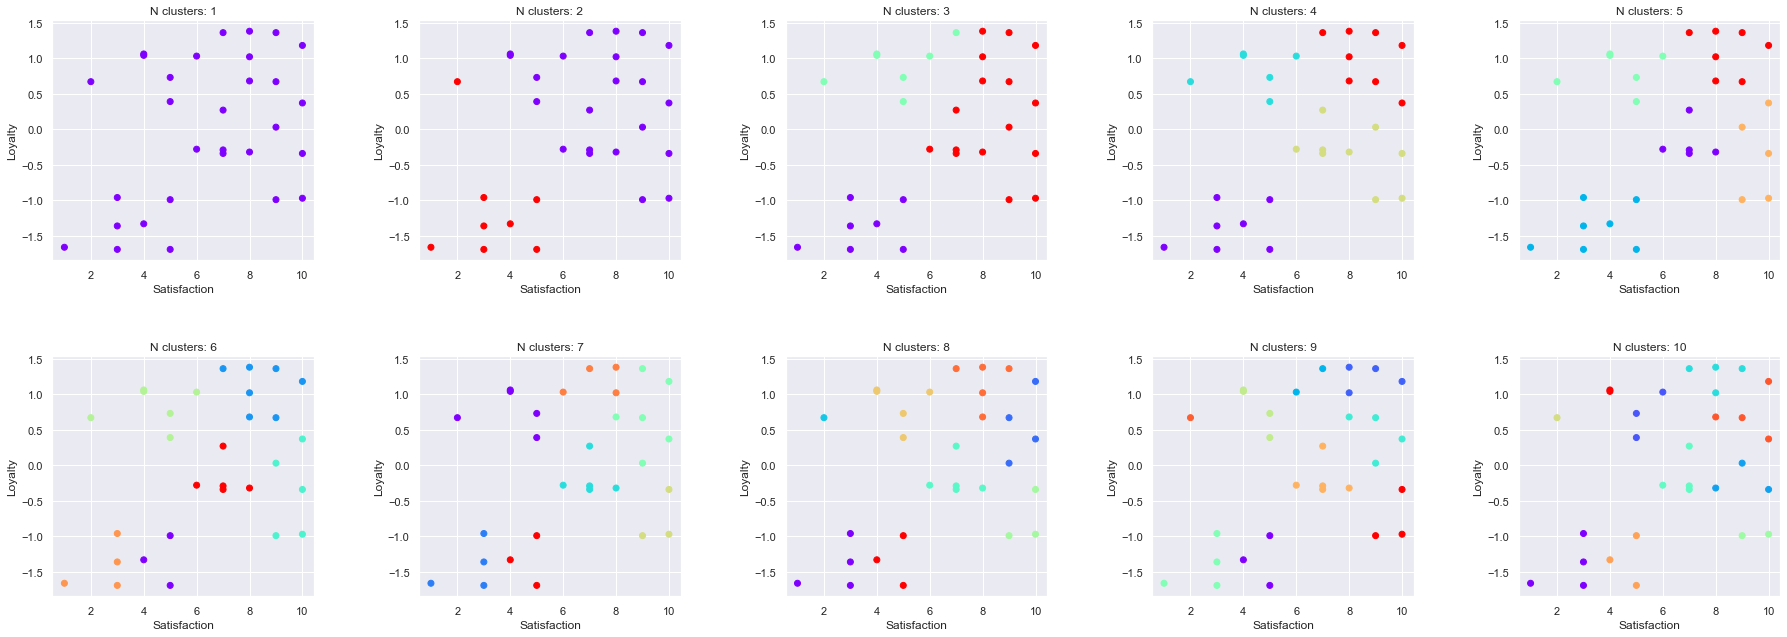

In [14]:
# plot a figure for each number of clusters
fig, axs = plt.subplots(2, 5, figsize=(30, 10))
for row in range(0,2):
  for col in range (0,5):
    n_clusters = row*5+(col+1)
    axs[row,col].scatter( result['Satisfaction'], result['Loyalty'], c=result['cluster_pred_' + str(n_clusters)], cmap='rainbow')
    axs[row,col].set_title('N clusters: ' + str(n_clusters))
    axs[row,col].set_xlabel('Satisfaction')
    axs[row,col].set_ylabel('Loyalty')

# set the spacing between subplots
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.4)
plt.show()

Text(0, 0.5, 'WCSS')

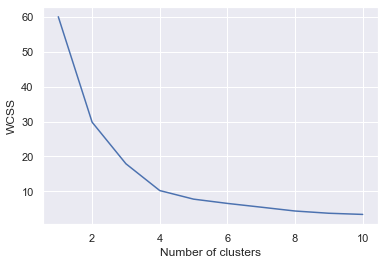

In [15]:
# Plot the number of clusters vs WCSS
plt.plot(range(1,11),wcss)
# Name your axes
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

## Explore clustering solutions and select the number of clusters

Analyzing the WCSS graph (Elbon method), the ideal number of clusters seems to be between 4 and 6. With the help of the business area, it might be possible to identify the following groups:
- low loyalty and low satisfaction - alienated
- high loyalty and low satisfaction - supporters
- low loyalty and high satisfaction - roamers
- high loyalty and high satisfaction - fans

Including a fifth or sixth group would not make sense for the business.
So let's keep the final cluster number at 4.

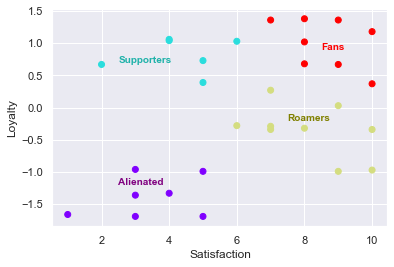

In [16]:
# Fiddle with K (the number of clusters)
n_clusters = 4
kmeans_new = KMeans(n_clusters, random_state=42)
# Fit the data
kmeans_new.fit(x_scaled)
# Create a new data frame with the predicted clusters
clusters_new = x.copy()
clusters_new['cluster_pred'] = kmeans_new.fit_predict(x_scaled)

plt.text(2.5, 0.7, 'Supporters', fontsize = 10, fontweight='bold', color='lightseagreen')
plt.text(2.5, -1.2, 'Alienated', fontsize = 10, fontweight='bold', color='purple')
plt.text(8.5, 0.9, 'Fans', fontsize = 10, fontweight='bold', color='red')
plt.text(7.5, -0.2, 'Roamers', fontsize = 10, fontweight='bold', color='olive')

plt.scatter( clusters_new['Satisfaction'], clusters_new['Loyalty'], c=clusters_new['cluster_pred'], cmap='rainbow')
plt.xlabel('Satisfaction')
plt.ylabel('Loyalty')
plt.show()

In [17]:
# Check if everything seems right
clusters_new

,Satisfaction,Loyalty,cluster_pred
0,4,-1.33,0
1,6,-0.28,2
2,5,-0.99,0
3,7,-0.29,2
4,4,1.06,1
5,1,-1.66,0
6,10,-0.97,2
7,8,-0.32,2
8,8,1.02,3
9,8,0.68,3


Text(0, 0.5, 'Loyalty')

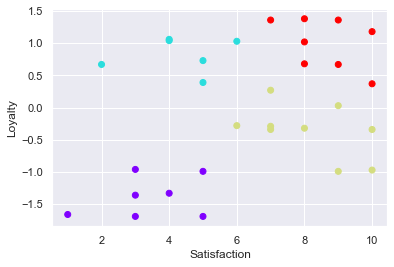

In [18]:
# Plot
plt.scatter(clusters_new['Satisfaction'],clusters_new['Loyalty'],c=clusters_new['cluster_pred'],cmap='rainbow')
plt.xlabel('Satisfaction')
plt.ylabel('Loyalty')

## Time for action

Our goal now is to increase customer **Satisfaction** and **Loyalty** in order to turn them into fans.

How to increase **Loyalty**
- discount vouchers
- loyalty cards
- raffles


How to increase **Satisfaction**
- paying attention to customer feedback.
  Eg: if there is a complaint of delay in paying, the number of cashiers could be increased.